In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Andy's api key
api_key = "bab6ed8714b504b5454b34baa8e421bb"

In [3]:
# Generate random cities by lat,lng
# List for holding lat_lngs
lat_lngs = []
cities = []

In [4]:
# create a set of random lat and lng combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1500)
lat_lngs=zip(lats, lngs)

In [5]:
# identify nearest city for each lat, lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

In [6]:
len(cities)

609

In [7]:
# create DataFrame for cities
cities_df = pd.DataFrame({'City': cities})

In [8]:
cities_df.tail()

,City
604,middelburg
605,yulara
606,port-gentil
607,moosomin
608,junin


In [9]:
# randomly select 500 cities (test with 5)
selected_cities = cities_df.sample(n=600)
selected_cities.head()

,City
451,aykhal
505,mantua
235,ahipara
168,hasaki
64,rungata


In [10]:
selected_cities["Latitude"] = ""
selected_cities["Longitude"] = ""
selected_cities["Country"] = ""
selected_cities["Temperature"] = ""
selected_cities["Humidity %"] = ""
selected_cities["Wind Speed"] = ""
selected_cities["Cloudiness %"] = ""
selected_cities.head()

,City,Latitude,Longitude,Country,Temperature,Humidity %,Wind Speed,Cloudiness %
451,aykhal,,,,,,,
505,mantua,,,,,,,
235,ahipara,,,,,,,
168,hasaki,,,,,,,
64,rungata,,,,,,,


In [11]:
# rearrange order of columns
selected_cities = selected_cities[['Country', 'City', 'Latitude', 'Longitude', 'Temperature', 'Humidity %',
                                 'Wind Speed', 'Cloudiness %']]

In [12]:
selected_cities.tail()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
335,,inta,,,,,,
339,,victoria,,,,,,
575,,kerema,,,,,,
592,,moranbah,,,,,,
385,,bontang,,,,,,


In [13]:
selected_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 451 to 385
Data columns (total 8 columns):
Country         600 non-null object
City            600 non-null object
Latitude        600 non-null object
Longitude       600 non-null object
Temperature     600 non-null object
Humidity %      600 non-null object
Wind Speed      600 non-null object
Cloudiness %    600 non-null object
dtypes: object(8)
memory usage: 42.2+ KB


In [14]:
# counter 
row_count = 0

for index, row in selected_cities.iterrows():
    # Create endpoint URL
    
    city_row = row["City"]
    #target_url = "http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&units=IMPERIAL&mode=json&APPID={}".format(lat, lng,api_key)
    target_url = "http://api.openweathermap.org/data/2.5/weather?q={}&units=IMPERIAL&mode=json&APPID={}".format(city_row,api_key)
    
    # print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count +=1
    
    # run requests to grab JSON at the requested URL
    requests = req.get(target_url).json()
    
    # append the lat/lng to appropiate columns
    # use try / except to skip any cities
    
    try:
        selected_cities.set_value(index, "Country", requests["sys"]["country"])
        selected_cities.set_value(index, "Latitude", requests["coord"]["lat"])
        selected_cities.set_value(index, "Longitude", requests["coord"]["lon"])
        selected_cities.set_value(index, "Temperature", requests["main"]["temp_max"])
        selected_cities.set_value(index, "Humidity %", requests["main"]["humidity"])
        selected_cities.set_value(index, "Wind Speed", requests["wind"]["speed"])
        selected_cities.set_value(index, "Cloudiness %", requests["clouds"]["all"])
        
        print("--", end="")
    
    except:
        print(" Missing field... skipping.")

selected_cities.head()

Now retrieving city # 0
http://api.openweathermap.org/data/2.5/weather?q=aykhal&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 1
http://api.openweathermap.org/data/2.5/weather?q=mantua&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 2
http://api.openweathermap.org/data/2.5/weather?q=ahipara&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 3
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 4
http://api.openweathermap.org/data/2.5/weather?q=rungata&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 5
http://api.openweathermap.org/data/2.5/weather?q=khandyga&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 6
http://api.openweathermap.org/data/2.5/weather?q=bengkulu&units=IMPERI

--Now retrieving city # 54
http://api.openweathermap.org/data/2.5/weather?q=falmouth&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 55
http://api.openweathermap.org/data/2.5/weather?q=jumla&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 56
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 57
http://api.openweathermap.org/data/2.5/weather?q=buariki&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 58
http://api.openweathermap.org/data/2.5/weather?q=nelson bay&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 59
http://api.openweathermap.org/data/2.5/weather?q=namatanai&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 60
http://api.openweathermap.org/data/2.5/weather?q=s

 Missing field... skipping.
Now retrieving city # 109
http://api.openweathermap.org/data/2.5/weather?q=sayyan&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 110
http://api.openweathermap.org/data/2.5/weather?q=esfahan&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 111
http://api.openweathermap.org/data/2.5/weather?q=codrington&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 112
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 113
http://api.openweathermap.org/data/2.5/weather?q=barrow&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 114
http://api.openweathermap.org/data/2.5/weather?q=bryan&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 115
http://api.openweathermap.org/data/2.5/weather?q=t

--Now retrieving city # 163
http://api.openweathermap.org/data/2.5/weather?q=barinas&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 164
http://api.openweathermap.org/data/2.5/weather?q=kumluca&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 165
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 166
http://api.openweathermap.org/data/2.5/weather?q=chagda&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 167
http://api.openweathermap.org/data/2.5/weather?q=santiago del estero&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 168
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 169
http://api.openweathermap.org/data/2.5

--Now retrieving city # 216
http://api.openweathermap.org/data/2.5/weather?q=burica&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 217
http://api.openweathermap.org/data/2.5/weather?q=nalut&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 218
http://api.openweathermap.org/data/2.5/weather?q=vardo&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 219
http://api.openweathermap.org/data/2.5/weather?q=castelo do piaui&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 220
http://api.openweathermap.org/data/2.5/weather?q=isangel&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 221
http://api.openweathermap.org/data/2.5/weather?q=koumac&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 222
http://api.openweathermap.org/data/2.5/weather?q=

--Now retrieving city # 270
http://api.openweathermap.org/data/2.5/weather?q=nizhniy ufaley&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 271
http://api.openweathermap.org/data/2.5/weather?q=kamina&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 272
http://api.openweathermap.org/data/2.5/weather?q=changji&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 273
http://api.openweathermap.org/data/2.5/weather?q=lithakia&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 274
http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 275
http://api.openweathermap.org/data/2.5/weather?q=rabat&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 276
http://api.openweathermap.org/data/2.5/weather?q=laguna&units=IMPE

--Now retrieving city # 323
http://api.openweathermap.org/data/2.5/weather?q=comodoro rivadavia&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 324
http://api.openweathermap.org/data/2.5/weather?q=arawa&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 325
http://api.openweathermap.org/data/2.5/weather?q=lebu&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 326
http://api.openweathermap.org/data/2.5/weather?q=knysna&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 327
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 328
http://api.openweathermap.org/data/2.5/weather?q=birobidzhan&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 329
http://api.openweathermap.org/data/2.5/weather?q=richards bay&units=

--Now retrieving city # 377
http://api.openweathermap.org/data/2.5/weather?q=coruripe&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 378
http://api.openweathermap.org/data/2.5/weather?q=saint-francois&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 379
http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 380
http://api.openweathermap.org/data/2.5/weather?q=mount isa&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 381
http://api.openweathermap.org/data/2.5/weather?q=salamiyah&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 382
http://api.openweathermap.org/data/2.5/weather?q=hovd&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 383
http://api.openweathermap.org/data/2.5/weather?q=roswell&units=IMPERIA

--Now retrieving city # 432
http://api.openweathermap.org/data/2.5/weather?q=marsh harbour&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 433
http://api.openweathermap.org/data/2.5/weather?q=tabou&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 434
http://api.openweathermap.org/data/2.5/weather?q=hokitika&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 435
http://api.openweathermap.org/data/2.5/weather?q=pires do rio&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 436
http://api.openweathermap.org/data/2.5/weather?q=uch&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 437
http://api.openweathermap.org/data/2.5/weather?q=puerto baquerizo moreno&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 438
http://api.openweathermap.org/

--Now retrieving city # 486
http://api.openweathermap.org/data/2.5/weather?q=khromtau&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 487
http://api.openweathermap.org/data/2.5/weather?q=grimari&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 488
http://api.openweathermap.org/data/2.5/weather?q=esterhazy&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 489
http://api.openweathermap.org/data/2.5/weather?q=tucuman&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 490
http://api.openweathermap.org/data/2.5/weather?q=saldanha&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 491
http://api.openweathermap.org/data/2.5/weather?q=caravelas&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 492
http://api.openweath

--Now retrieving city # 539
http://api.openweathermap.org/data/2.5/weather?q=kiama&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 540
http://api.openweathermap.org/data/2.5/weather?q=port moresby&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 541
http://api.openweathermap.org/data/2.5/weather?q=marawi&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 542
http://api.openweathermap.org/data/2.5/weather?q=maceio&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 543
http://api.openweathermap.org/data/2.5/weather?q=coihaique&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 544
http://api.openweathermap.org/data/2.5/weather?q=marienburg&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 545
http://api.openweathermap.org/data/2.5/weather?q=brae&units=IMPERIAL&mod

--Now retrieving city # 593
http://api.openweathermap.org/data/2.5/weather?q=catalina foothills&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 594
http://api.openweathermap.org/data/2.5/weather?q=hami&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 595
http://api.openweathermap.org/data/2.5/weather?q=inta&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 596
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 597
http://api.openweathermap.org/data/2.5/weather?q=kerema&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 598
http://api.openweathermap.org/data/2.5/weather?q=moranbah&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 599
http://api.openweathermap.org/data/2.5/weather?q=bontang&units=IMPERIAL&

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
451,RU,aykhal,66,111.5,-25.75,37,2.73,68
505,CU,mantua,22.29,-84.28,80.41,67,7.09,12
235,NZ,ahipara,-35.17,173.17,70.29,71,8.55,0
168,JP,hasaki,35.73,140.83,32,100,1.12,20
64,,rungata,,,,,,


In [15]:
selected_cities.dtypes

Country         object
City            object
Latitude        object
Longitude       object
Temperature     object
Humidity %      object
Wind Speed      object
Cloudiness %    object
dtype: object

In [16]:
selected_cities.convert_objects(convert_numeric=True)

/Users/andy_felicitas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
451,RU,aykhal,66.00,111.50,-25.75,37.0,2.73,68.0
505,CU,mantua,22.29,-84.28,80.41,67.0,7.09,12.0
235,NZ,ahipara,-35.17,173.17,70.29,71.0,8.55,0.0
168,JP,hasaki,35.73,140.83,32.00,100.0,1.12,20.0
64,,rungata,NaN,NaN,NaN,NaN,NaN,NaN
448,RU,khandyga,62.67,135.60,-39.07,81.0,2.73,56.0
53,ID,bengkulu,-3.80,102.27,79.11,100.0,4.29,56.0
17,RU,yerbogachen,61.28,108.01,-12.43,77.0,2.95,68.0
39,PG,kavieng,-2.57,150.80,78.75,100.0,7.43,88.0
43,,mahaicony,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# save df as a csv
selected_cities.to_csv("weather_py_data_2.csv", encoding="utf-8", index=False)

In [18]:
df = pd.read_csv("weather_py_data_2.csv")

In [19]:
df.head()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
0,RU,aykhal,66.00,111.50,-25.75,37.0,2.73,68.0
1,CU,mantua,22.29,-84.28,80.41,67.0,7.09,12.0
2,NZ,ahipara,-35.17,173.17,70.29,71.0,8.55,0.0
3,JP,hasaki,35.73,140.83,32.00,100.0,1.12,20.0
4,NaN,rungata,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.shape

(600, 8)

In [21]:
df.isnull().sum()

Country         84
City             0
Latitude        78
Longitude       78
Temperature     78
Humidity %      78
Wind Speed      78
Cloudiness %    78
dtype: int64

In [22]:
new_df = df.dropna(how='any')

In [23]:
new_df.head()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
0,RU,aykhal,66.00,111.50,-25.75,37.0,2.73,68.0
1,CU,mantua,22.29,-84.28,80.41,67.0,7.09,12.0
2,NZ,ahipara,-35.17,173.17,70.29,71.0,8.55,0.0
3,JP,hasaki,35.73,140.83,32.00,100.0,1.12,20.0
5,RU,khandyga,62.67,135.60,-39.07,81.0,2.73,56.0


In [24]:
new_df.shape

(516, 8)

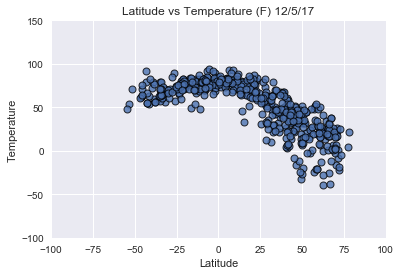

In [27]:
# plot Temperature vs Latitude

plt.scatter(new_df["Latitude"],
           new_df["Temperature"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Temperature (F) 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-100, 150])

plt.savefig("LatTemp2.png")
sns.set()
plt.show()

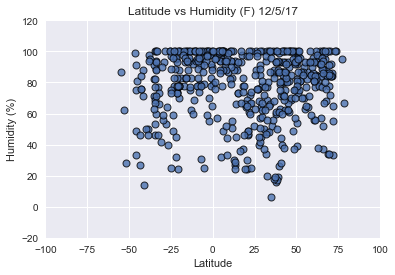

In [26]:
plt.scatter(new_df["Latitude"],
           new_df["Humidity %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Humidity (F) 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# save figure
plt.savefig("LatHumidity2.png")
sns.set()
plt.show()

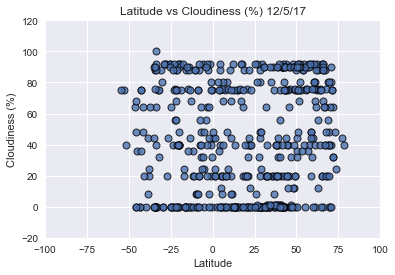

In [28]:
plt.scatter(new_df["Latitude"],
           new_df["Cloudiness %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Cloudiness (%) 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# save figure
plt.savefig("LatCloud2.png")
sns.set()
plt.show()

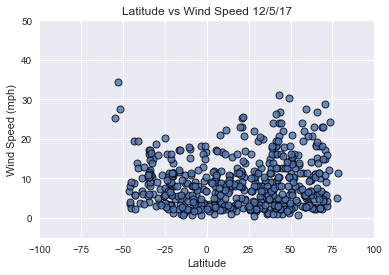

In [29]:
plt.scatter(new_df["Latitude"],
           new_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Wind Speed 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-5, 50])

# save figure
plt.savefig("LatWind2.png")
sns.set()
plt.show()